In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
import plotly.graph_objs as go
import plotly.express as px


In [2]:
n_asset = 2

In [3]:
mu = np.linspace(50, 200, n_asset) / 1e4
sigma = np.linspace(300, 800, n_asset) / 1e4
cov = np.diag(sigma ** 2)

In [4]:
# tc_list = [0, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.05]
tc_list = [0, 0.0001, 0.0002, 0.0003,
           0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]
# tc_list = [0.0008]

In [5]:
df_list = []
for tc in tc_list:
    tmp_df = pd.read_csv(f"results/models/dp_tc_{tc}_assets_2", index_col=0, dtype=np.float32)
    df_list.append(tmp_df)

In [6]:
# df_0 = pd.read_csv("results/models/dp_tc_0_assets_2", index_col=0, dtype=np.float32)
# df_01 = pd.read_csv("results/models/dp_tc_0.001_assets_2", index_col=0, dtype=np.float32)
# df_02 = pd.read_csv("results/models/dp_tc_0.002_assets_2", index_col=0, dtype=np.float32)
# df_05 = pd.read_csv("results/models/dp_tc_0.0005_assets_2", index_col=0, dtype=np.float32)
# df_5 = pd.read_csv("results/models/dp_tc_0.005_assets_2", index_col=0, dtype=np.float32)
# df_10 = pd.read_csv("results/models/dp_tc_0.01_assets_2", index_col=0, dtype=np.float32)
# df_50 = pd.read_csv("results/models/dp_tc_0.05_assets_2", index_col=0, dtype=np.float32)

In [7]:
# df_list = [df_0, df_05, df_01, df_02, df_5, df_10, df_50]

In [8]:
state_possible = pd.to_numeric(tmp_df.index.values)
action_possible = pd.to_numeric(tmp_df.columns.values)

In [9]:
# List of n_asset values
n_assets_list = [2]

# List of transaction cost values
# tc_list = [0, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.05]


In [10]:
action_df = pd.DataFrame(index=state_possible)
action_bm_df = pd.DataFrame(index=state_possible)
for tc, bell in zip(tc_list, df_list):
    # visualize q table
    # action = np.array([action_possible[i] for i in np.argmax(bell, axis=1)])
    action = pd.to_numeric(bell.idxmax(axis=1)).values
    action_df[f"TC: {tc * 1e4:.0f} bps"] = action
    # action_bm = []
    # for i in state_possible:
    #     a = state_possible[np.argmax([net_sharpe(np.array([j, 1 - j]), mu, cov, np.array([i, 1 - i]), tc) for j in state_possible])] - i
    #     action_bm.append(a)
    # action_bm = np.array(action_bm)
    # action_bm_df[f"TC: {tc * 1e4:.0f} bps BM"] = action_bm
    # if tc == 0.0009:
    #     a = bell.copy(deep=True)
    #     b = action

In [11]:
action_df

,TC: 0 bps,TC: 1 bps,TC: 2 bps,TC: 3 bps,TC: 4 bps,TC: 5 bps,TC: 6 bps,TC: 7 bps,TC: 8 bps,TC: 9 bps,TC: 10 bps
0.01,1,1,1,1,1,1,0,0,0,0,0
0.02,1,1,1,1,1,1,0,0,0,0,0
0.03,1,1,1,1,1,1,0,0,0,0,0
0.04,1,1,1,1,1,1,0,0,0,0,0
0.05,1,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
0.95,1,1,1,1,1,1,1,1,1,1,1
0.96,1,1,1,1,1,1,1,1,1,1,1
0.97,1,1,1,1,1,1,1,1,1,1,1
0.98,1,1,1,1,1,1,1,1,1,1,1


In [12]:
optimal_weight = find_optimal_wgt(mu, cov).round(2)
optimal_weight

array([0.64, 0.36])

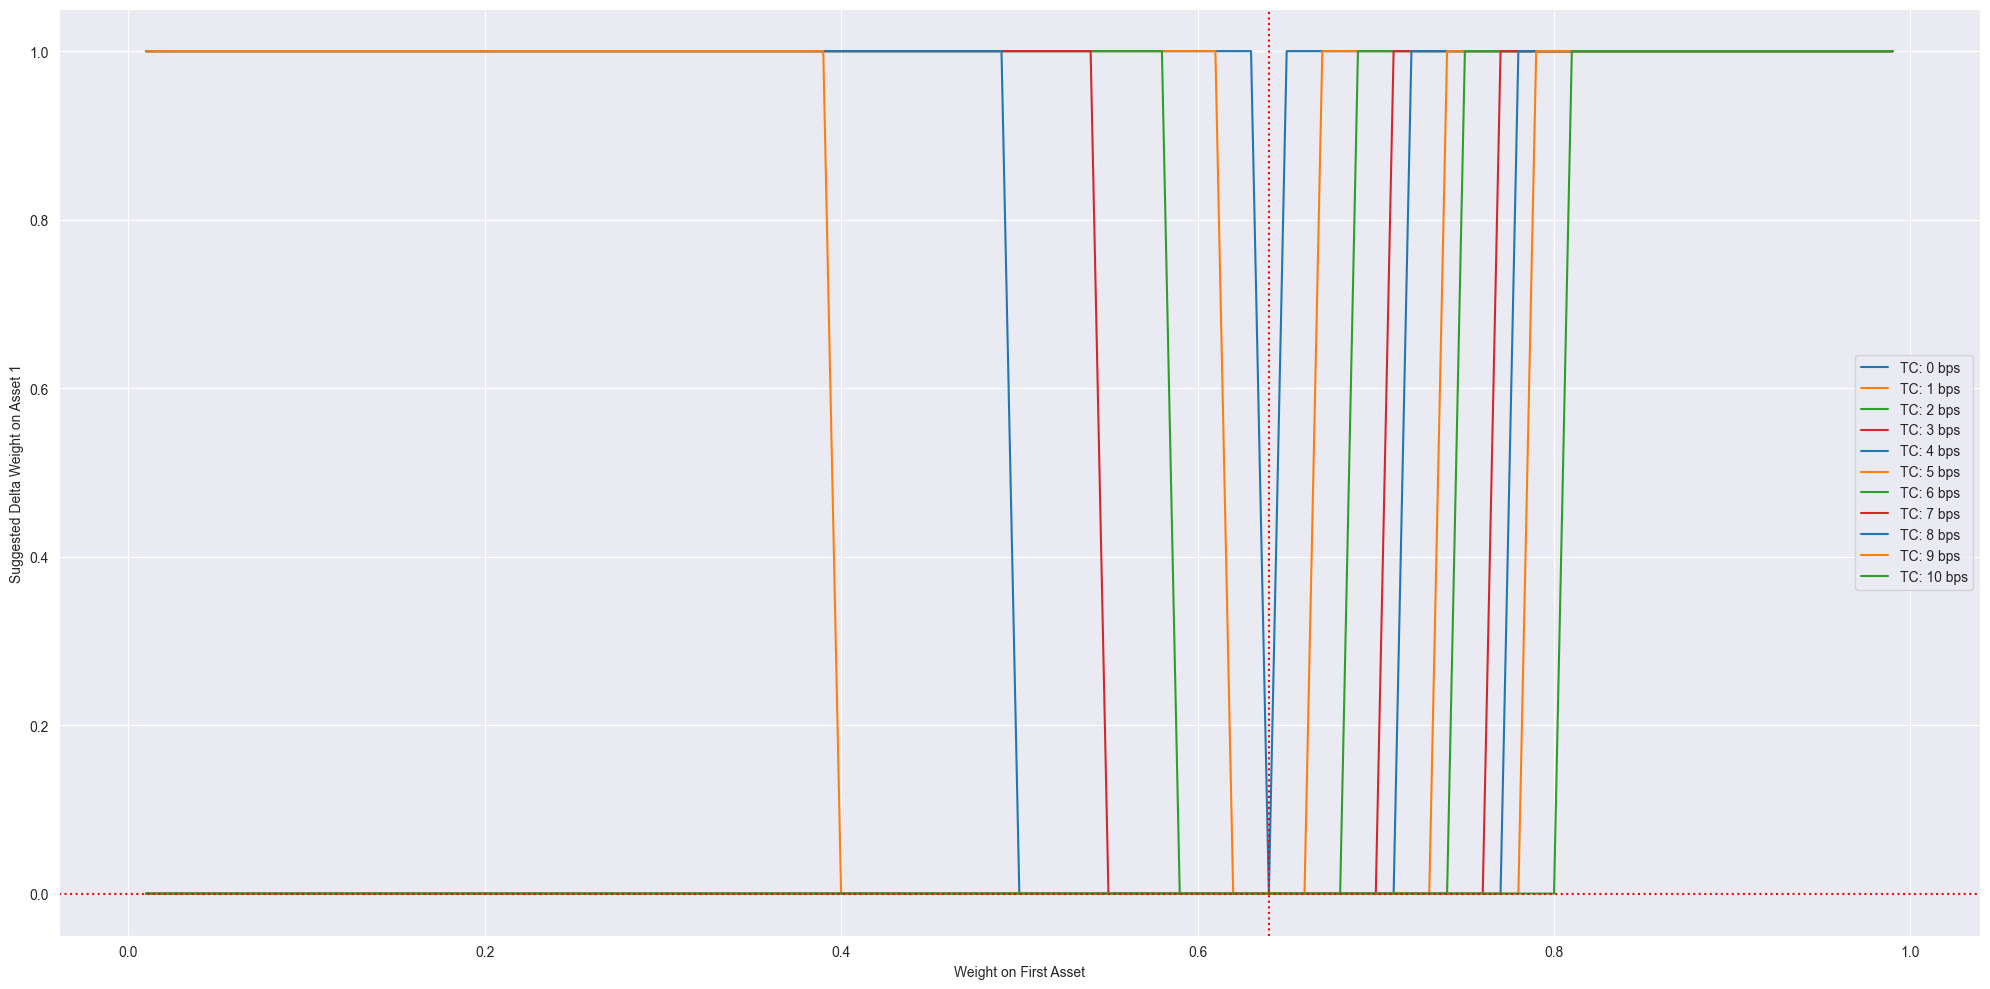

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
action_df.plot(ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
# action_bm_df.plot(ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], linestyle="dashed")
ax.set_xlabel("Weight on First Asset")
ax.set_ylabel("Suggested Delta Weight on Asset 1")
ax.axvline(optimal_weight[0], color="red", linestyle="dotted")
ax.axhline(0, color="red", linestyle="dotted")
ax.legend()
plt.tight_layout()
plt.show()
plt.close()


In [14]:
action_df

,TC: 0 bps,TC: 1 bps,TC: 2 bps,TC: 3 bps,TC: 4 bps,TC: 5 bps,TC: 6 bps,TC: 7 bps,TC: 8 bps,TC: 9 bps,TC: 10 bps
0.01,1,1,1,1,1,1,0,0,0,0,0
0.02,1,1,1,1,1,1,0,0,0,0,0
0.03,1,1,1,1,1,1,0,0,0,0,0
0.04,1,1,1,1,1,1,0,0,0,0,0
0.05,1,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
0.95,1,1,1,1,1,1,1,1,1,1,1
0.96,1,1,1,1,1,1,1,1,1,1,1
0.97,1,1,1,1,1,1,1,1,1,1,1
0.98,1,1,1,1,1,1,1,1,1,1,1


<Axes: >

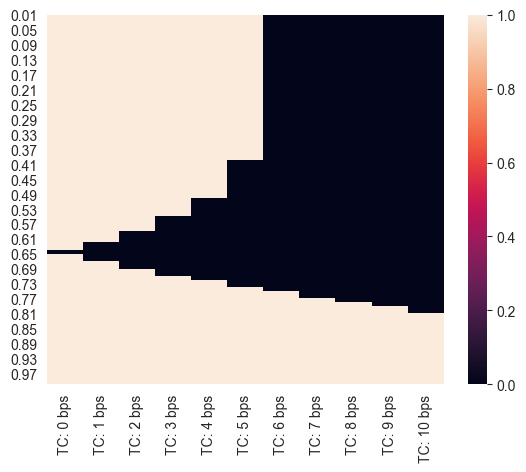

In [15]:
import seaborn as sns
sns.heatmap(action_df)

In [20]:
# Create a heatmap trace for DP Bellman
trace_dp = go.Heatmap(z=action_df, x=action_df.columns, y=action_df.index, name="DP Binary Bellman")

# Create the layout with 'overlay' parameter set to "overlay"
layout = go.Layout(
    title="DP Binary Bellman Output",
    xaxis=dict(title="Transaction Cost (bps)",
               showgrid=True),
    yaxis=dict(title="Weight on First Asset",
               showgrid=True),
    # barmode="overlay"  # Set the barmode to overlay
)

# Add horizontal line at y=0.50
layout.shapes = [
    dict(
        type="line",
        x0=action_df.columns[0],  # Adjust x0 to the starting point of your data
        x1=action_df.columns[-1],  # Adjust x1 to the ending point of your data
        y0=optimal_weight[0],
        y1=optimal_weight[0],
        line=dict(color="red", width=0.5),  # You can customize the color and width of the line
    )
]

# Create the figure
fig = go.Figure(data=[trace_dp], layout=layout)
fig.show()

In [22]:
action_df.columns

Index(['TC: 0 bps', 'TC: 1 bps', 'TC: 2 bps', 'TC: 3 bps', 'TC: 4 bps',
       'TC: 5 bps', 'TC: 6 bps', 'TC: 7 bps', 'TC: 8 bps', 'TC: 9 bps',
       'TC: 10 bps'],
      dtype='object')

In [24]:
bm_noreb = {}
for col in action_df.columns:
    bm_index = action_df[action_df[col] == 0].index.values
    bm_noreb[col] = bm_index

In [26]:
# Create a DataFrame from the dictionary, excluding keys with empty values
df = pd.DataFrame.from_dict(bm_noreb, orient='index').T

# Create a box plot using Plotly
fig = px.box(df, title="Box Plot of Data")

# Show the plot
fig.show()

In [18]:
obj_func(x = optimal_weight, mu=mu, cov=cov)

-0.3004626062886657

In [19]:
import os
os.getcwd()

'/Users/Roy/Desktop/College/GeorgiaTech/Research/Portfolio-Rebalancing-DQN/DP_Binary_split'